In this assignment we'll ask you to plot multiple variables.   

You will use what you find in this assignment to answer the questions in the quiz that follows. It may be useful to keep this notebook side-by-side with this week's quiz on your screen.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

path = "Cartwheeldata.csv"

In [2]:
# First, you must import the cartwheel data from the path given above
df = pd.read_csv('Cartwheeldata.csv')

In [3]:
# Next, look at the 'head' of our DataFrame 'df'. 
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


If you can't remember a function, open a previous notebook or video as a reference, or use your favorite search engine to look for a solution.

In [42]:
df.describe()

,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,13.000000,28.240000,1.520000,0.560000,67.650000,66.260000,82.480000,0.76000,6.400000
std,7.359801,6.989754,0.509902,0.506623,4.431187,5.492647,15.058552,0.43589,2.533114
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.00000,2.000000
25%,7.000000,24.000000,1.000000,0.000000,64.000000,62.000000,70.000000,1.00000,4.000000
50%,13.000000,26.000000,2.000000,1.000000,68.000000,66.000000,81.000000,1.00000,6.000000
75%,19.000000,29.000000,2.000000,1.000000,71.000000,71.000000,92.000000,1.00000,8.000000
max,25.000000,56.000000,2.000000,1.000000,75.000000,76.000000,115.000000,1.00000,10.000000


## Scatter plots

First, let's looks at two variables that we expect to have a strong relationship, 'Height' and 'Wingspan'.

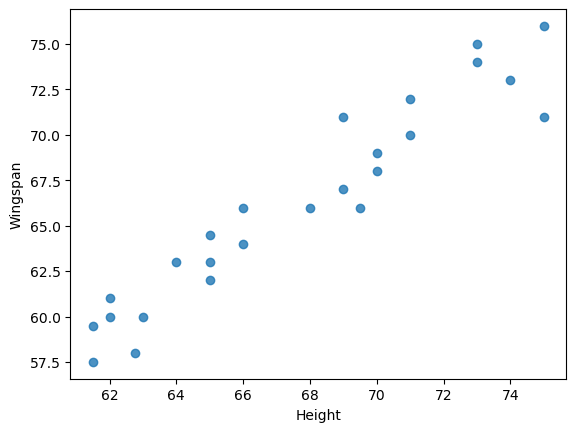

In [11]:
# Make a Seaborn scatter plot with x = height and y = wingspan using sns.scatterplot(x, y)
sns.regplot(x='Height', y='Wingspan', data=df, fit_reg=False);

How would you describe the relationship between 'Height' and 'Wingspan'?   
Questions you can ask:
* Is it linear? 
* Are there outliers?
* Are their ranges similar or different?  

How else could you describe the relationship?

***The relationship is linear with no outliers. There is a strong positive correlation between Height and Wingspan i.e., as wingspan increases, so does height.***

Now let's look at two variables that we don't yet assume have a strong relationship, 'Wingspan' and 'CWDistance'

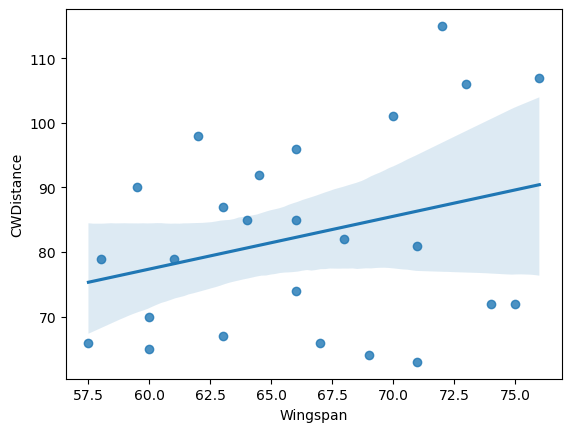

In [13]:
# Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance
sns.regplot(x='Wingspan', y='CWDistance', data=df, fit_reg=True);

In [14]:
df[['Wingspan','CWDistance']].corr()

,Wingspan,CWDistance
Wingspan,1.000000,0.297662
CWDistance,0.297662,1.000000


How would you describe the relationship between 'Wingspan' and 'CWDistance'?   
* Is it linear?
* Are there outliers?
* Are their ranges similar or different?  

How else could you describe the relationship?

***There is a weak positive relationship between Wingspan and Cartwheel distance with a lot of outliers***

Let makes the same plot as above, but now include 'Gender' as the color scheme by including the argument
```
hue=df['Gender']
```
in the Seaborn function

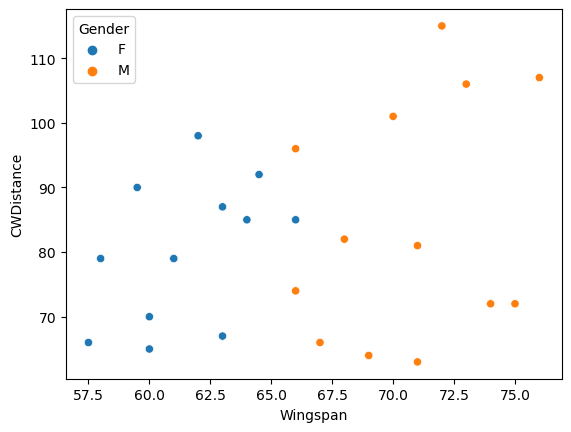

In [26]:
# Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance, and hue = gender
sns.scatterplot(x='Wingspan', y='CWDistance', hue='Gender', data=df);

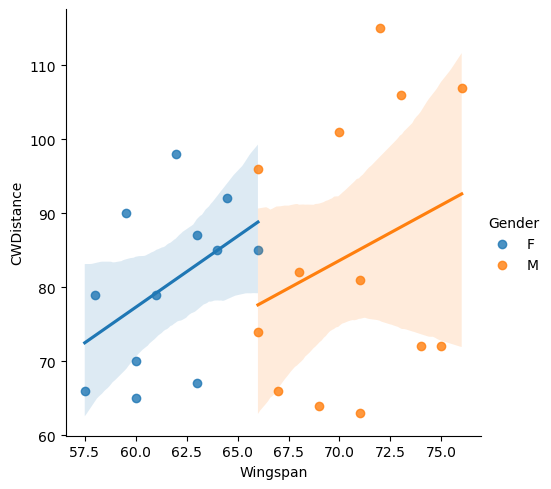

In [30]:
sns.lmplot(x='Wingspan', y='CWDistance', hue='Gender',
           data=df);

Does does this new information on the plot change your interpretation of the relationship between 'Wingspan' and 'CWDistance'?

***Splitting by Gender, we can see the correlation between wingspan and cartwheel distance for males and females are roughly the same with that of females being stronger.***

## Barcharts
Now lets plot barplots of 'Glasses'

In [38]:
# getting color to use in plots
base_color = sns.color_palette()[0]

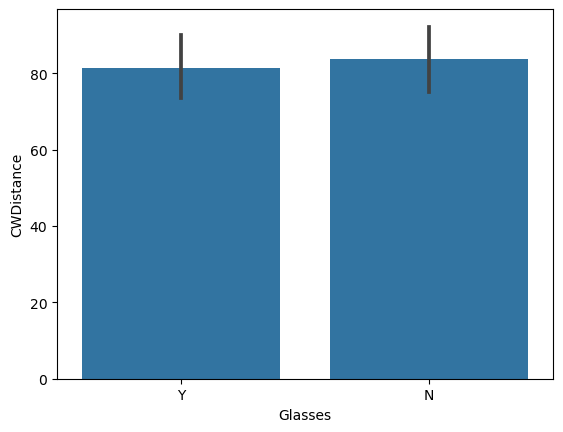

In [39]:
# Make a Seaborn barplot with x = glasses and y = cartwheel distance
sns.barplot(x='Glasses', y='CWDistance', data=df, color=base_color);

In [40]:
df.columns

Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')

What can you say about the relationship of 'Glasses' and 'CWDistance'?

***From the graph we can see that does who didn't were glasses covered more distance while doing a cartwheel than those who did although the difference in mean doesn't seem much.***

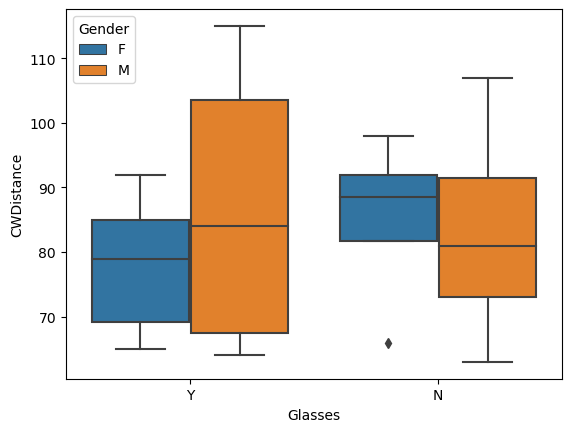

In [41]:
# Make the same Seaborn boxplot as above, but include gender for the hue argument
sns.boxplot(x='Glasses', y='CWDistance', data=df, hue='Gender');

How does this new plot change your interpretation about the relationship of 'Glasses' and 'CWDistance'?

***The cartwheel distance covered by males who didn't wear glasses is less than does who did while the opposite is observed in that of females. Females who wore glasses were observed to have covered more distance than those who didn't***